In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs,make_circles,make_moons


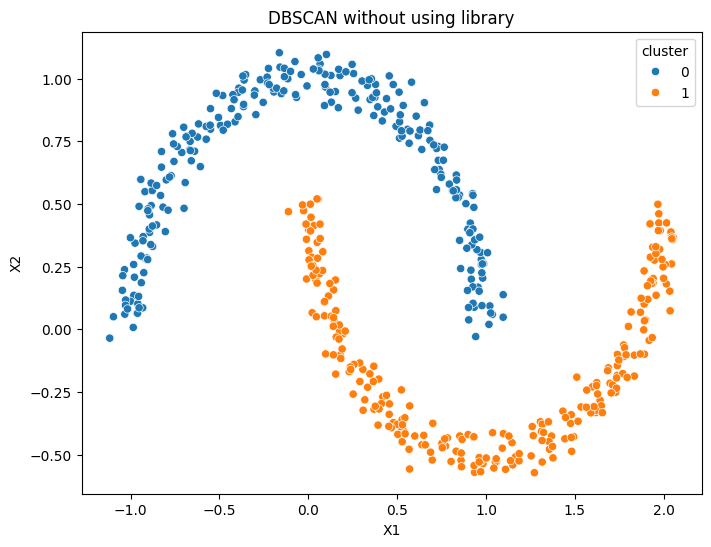

In [26]:
X, y = make_moons(n_samples=500, noise=0.05)
X = pd.DataFrame(X, columns=['X1', 'X2'])

epsilon = 0.1
min_points = 6

core_points = set()
for i in range(len(X)):
    x = X['X1'].iloc[i]
    y = X['X2'].iloc[i]
    distance = np.sqrt((X['X1'] - x)**2 + (X['X2'] - y)**2)
    neighbors = X[distance <= epsilon]
    if len(neighbors) >= min_points:
        core_points.add((x, y))

visited = set()
clusters = []
core_points = list(core_points)

for core in core_points:
    if core in visited:
        continue
    cluster = set()
    queue = [core]
    while queue:
        point = queue.pop(0)
        if point in visited:
            continue
        visited.add(point)
        px, py = point
        distance = np.sqrt((X['X1'] - px)**2 + (X['X2'] - py)**2)
        neighbors = X[distance <= epsilon]
        if len(neighbors) >= min_points:
            for neighbor in neighbors.itertuples(index=False):
                neighbor_tuple = (neighbor.X1, neighbor.X2)
                if neighbor_tuple not in visited:
                    queue.append(neighbor_tuple)
        cluster.add(point)
    clusters.append(cluster)

X['cluster'] = -1
for idx, cluster in enumerate(clusters):
    for x1, x2 in cluster:
        mask = (X['X1'] == x1) & (X['X2'] == x2)
        X.loc[mask, 'cluster'] = idx

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='X1', y='X2', hue='cluster', palette='tab10')
plt.title('DBSCAN without using library')
plt.show()
